# * Part 1

### Import libraries

In [103]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pprint import pprint
import seaborn as sns

### Load the data

In [69]:
df = pd.read_json('~/Downloads/ultimate_challenge/logins.json')

### Explore the data

In [70]:
print(df.keys())
print(len(df['login_time']))

Index(['login_time'], dtype='object')
93142


In [71]:
print(df.head(10))
print('\n')
print(df.describe())
print('\n')
print(df.info())
print('\n')
print(type(df.login_time[0]))

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
5 1970-01-01 20:21:41
6 1970-01-01 20:12:16
7 1970-01-01 20:35:47
8 1970-01-01 20:35:38
9 1970-01-01 20:47:52


                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Utilizing the timestamps as type DateTimeIndex in order to resample 

In [72]:
df.set_index('login_time', inplace=True)

### resampling the data into 15 minutes interval

In [73]:
df['count'] = 1
fifteen_min_df = df.resample('15T').count()
print('Fist timestamp:{}'.format(fifteen_min_df.index.min()))
print('Last timestamp:{}'.format(fifteen_min_df.index.max()))
fifteen_min_df.head(10)

Fist timestamp:1970-01-01 20:00:00
Last timestamp:1970-04-13 18:45:00


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


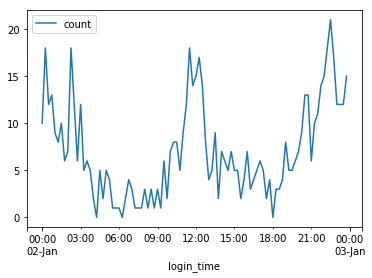

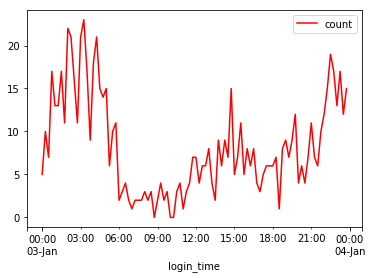

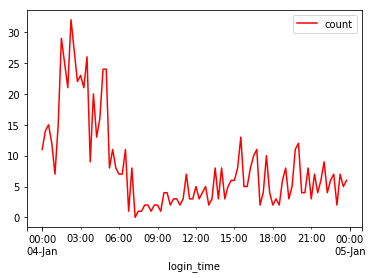

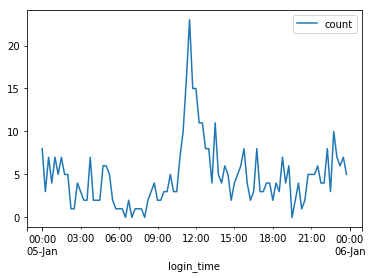

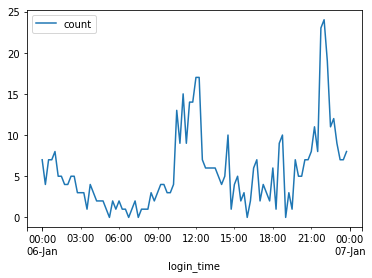

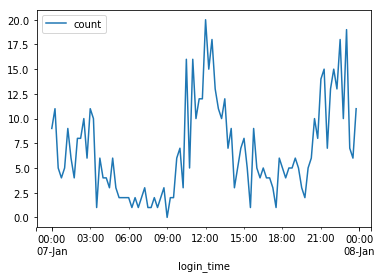

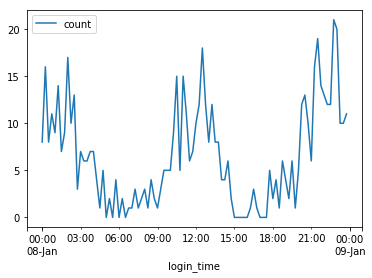

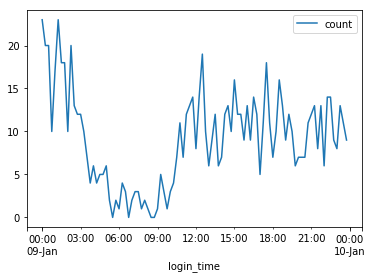

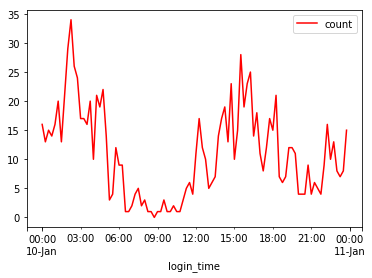

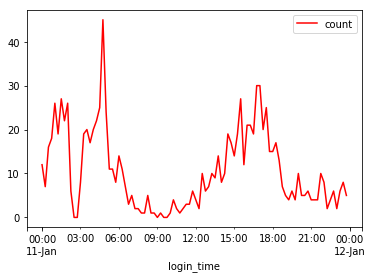

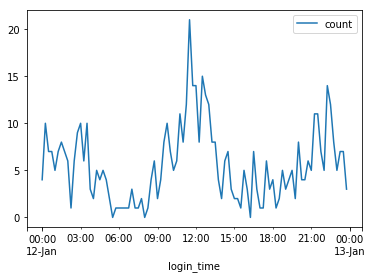

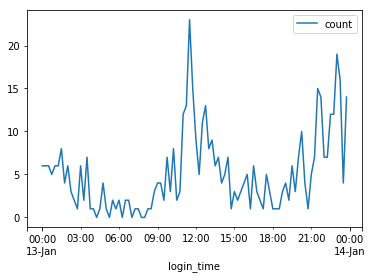

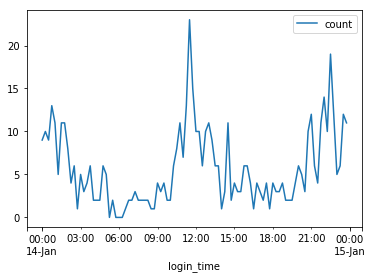

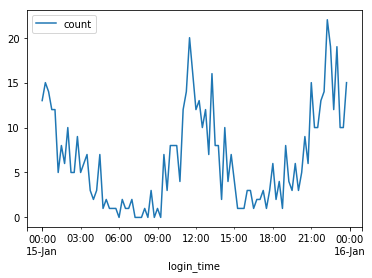

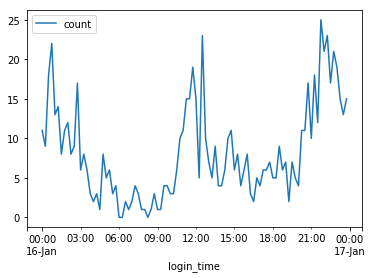

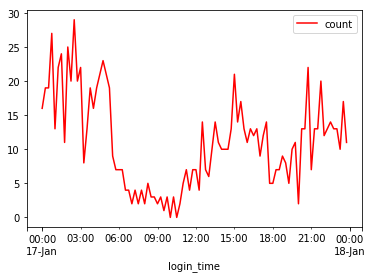

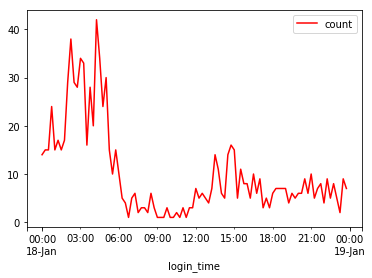

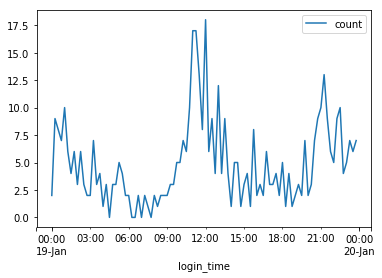

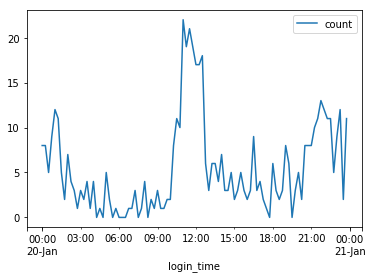

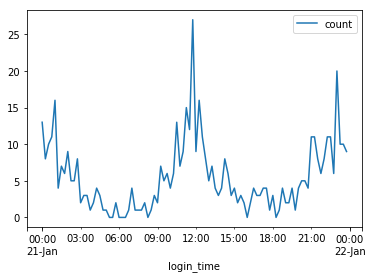

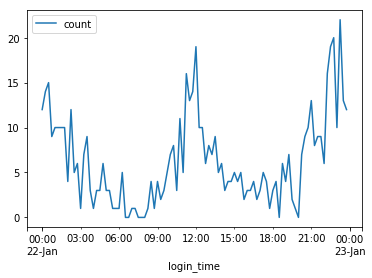

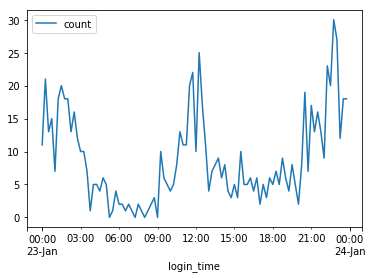

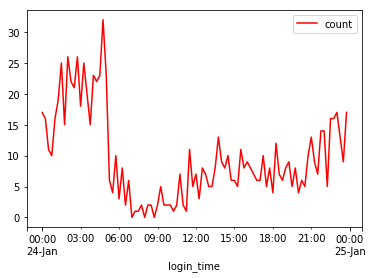

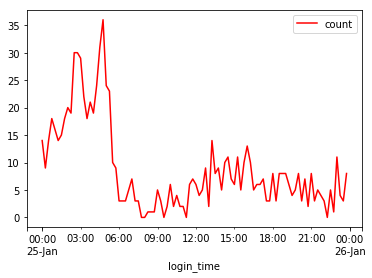

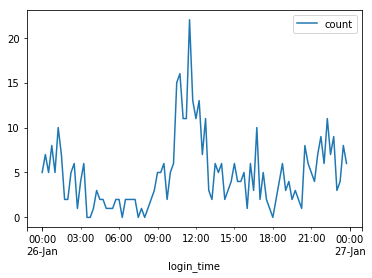

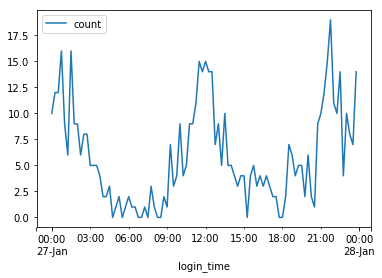

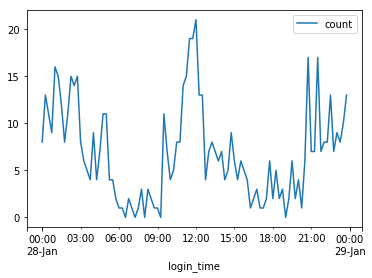

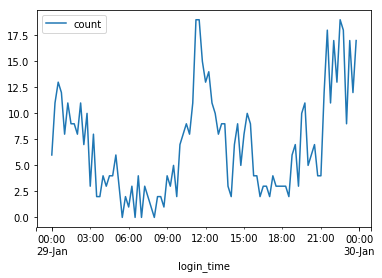

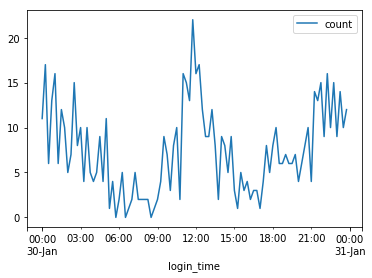

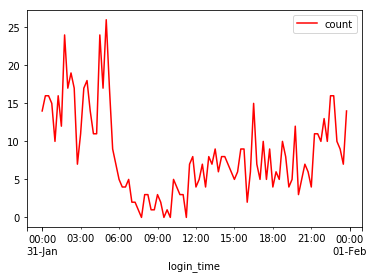

In [74]:
for i in range(2,32):
    #extract daily timestamps one by one
    day = '1970-01-{}'.format(i)
    date = fifteen_min_df.loc[day:day]
    
    #If the current day is a weekend [Saturday or Sunday] color it red
    if i in [3,4,10,11,17,18,24,25,31]:
        date.plot(color='r')
        plt.show()
    #Plot weekdays as blue
    else:
        date.plot()
        plt.show()

### As it shows; the pickup for weekdays are on noon time and evening and then steady trend until early AM time and then goes down and again pickup on noon. And for weekdays, it picks up on midnight, has a steady trend untill early morning and turn down and then slightly back up in afternoon.<br> let's see trend for rest of the months.

In [77]:
#Create a column shows timestamp's corresponding day of the week.
# 0= Mon, 1=Tue, 2=Wed, 3=Thu, 4=Fri, 5=Sat, 6=Sun
fifteen_min_df['day_of_week'] = fifteen_min_df.index.dayofweek
day_date = fifteen_min_df
day_date.head(10)

,count,day_of_week
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3
1970-01-01 21:15:00,4,3
1970-01-01 21:30:00,0,3
1970-01-01 21:45:00,4,3
1970-01-01 22:00:00,9,3


In [78]:
def plot_day(df, day, color = None):
    week = {'monday':0,'tuesday':1,'wednesday':2,'thursday':3,'friday':4,'saturday':5,'sunday':6}
    map_day = week[day]
    
    filtered_day = df[df.day_of_week == map_day]
    times = filtered_day.index
    filtered_day = filtered_day.groupby([times.hour, times.minute]).sum()

    
    filtered_day['count'].plot(color = color)
    plt.xlabel('Time of Day')
    plt.ylabel('Login Count')
    plt.title(day.title())
    plt.xticks([])

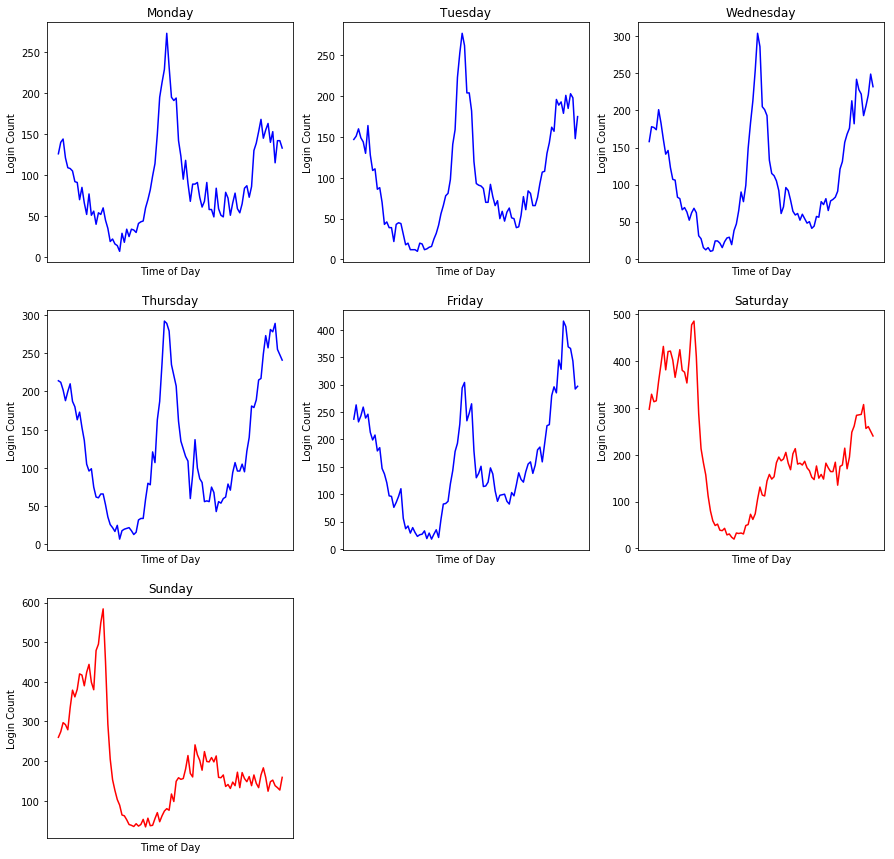

In [81]:
plt.subplots(nrows=3,ncols=3, figsize = (15,15))
ax1 = plt.subplot(3,3,1)
plot_day(day_date, 'monday', color = 'blue')

ax2 = plt.subplot(3,3,2)
plot_day(day_date, 'tuesday', color = 'blue')

ax3 = plt.subplot(3,3,3)
plot_day(day_date, 'wednesday', color = 'blue')

ax4 = plt.subplot(3,3,4)
plot_day(day_date, 'thursday', color = 'blue')

ax5 = plt.subplot(3,3,5)
plot_day(day_date, 'friday', color = 'blue')

ax6 = plt.subplot(3,3,6)
plot_day(day_date, 'saturday', color = 'red')

ax7 = plt.subplot(3,3,7)
plot_day(day_date, 'sunday', color = 'red')

ax8 = plt.subplot(3,3,8)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.spines['left'].set_visible(False)
ax8.spines['bottom'].set_visible(False)
ax8.get_xaxis().set_ticks([])
ax8.get_yaxis().set_ticks([])

ax9 = plt.subplot(3,3,9)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.spines['left'].set_visible(False)
ax9.spines['bottom'].set_visible(False)
ax9.get_xaxis().set_ticks([])
ax9.get_yaxis().set_ticks([])
plt.show()

### CONCLUSION<br>After aggregation for all 4 months, we see the same trend like January; a pickup on noon time and drop having almost steady trend and again pick up on evening time, this is for weekdays. For weekend; there is pickup on midnight untill early moring and drop down and slighty back up on afternoon and evening time.

# * Part 2

##### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.<br>However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.<br>1.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?<br>2.Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:<br>a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

# Answers
##### 1) Ultimate drivers should be tracked by pickup and dropoff locations for customers and also their travel back and forth between cities in order to find out which city is each driver favore before test starts. So we can have two groups (drivers exclusive in each city) that show statistics of the travels and be as a key measure of succes of the expriment based on whether or not  there is an increase in quantity of pickup/dropoff locations in both groups.<br>2) First a timeline restriction should be determined in order to compare effect of the change. And also track of travels of drivers between cities and then use this information to find out the change in their behavior whether or not be anomaly(increase service in other city) or randomly. After the stablish we should collect data affected by the change and compare to the baseline to determine if an incease of service is seen from drivers from opposing city.<br> But remember in order to show significant statistical result , we should revert back the change to their normal after the timeline restriction and then use time series analys to see if there was increase service among the cities and if the result return to the baseline after taking back the change.<br> so we can choose a partucular exclusived Gotham driver to determine if the change was succeeded or not and then apply it for the whole population.<br> There are two things to be considered; first the long of the timeline(too short makes it unreasonabl, too long makes it unstable data) and also we may miss some drivers during the stablish and also the test timeline!

# * Part 3
#### A new data set to make model to predict whethere or not a user will be active on the system.

In [86]:
with open('ultimate_challenge/ultimate_data_challenge.json') as datafile:
    data = json.load(datafile)
df1 = pd.DataFrame(data)
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [90]:
df1.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [91]:
df1.isna().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

##### The data set has 50000 rows and three features have missing values; 'avg_rating_by_driver', 'avg_rating_of_driver', 'phone'. Missing values for phone numbers is 396 which might not need imputation but for rating we need to do some, because rating always be an indicator for retention.

In [92]:
df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


#### Most of the numerical variables are in a small range of number, however rating variables are beween 1 and 5, but for others like ave_dist ranges between 0 and 161 therefore it should be scaled and also the variables with object value should be processed.

In [98]:
print(type(df1.last_trip_date[0]))
print(type(df1.signup_date[0]))

<class 'str'>
<class 'str'>


In [99]:
df1.last_trip_date = pd.to_datetime(df1.last_trip_date, format= '%Y-%m-%d')
df1.signup_date = pd.to_datetime(df1.signup_date, format= '%Y-%m-%d')

In [100]:
print(type(df1.last_trip_date[0]))
print(type(df1.signup_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Since a user is considered active if they get a ride in the last 30 day, therefore "last_trip_date" have to be encoded into a binary response. 1 for taking a trip in the last 30 days, 0 if it is not taken. We need to substract 30 days from oldest "last_trip_date" to make a cutoff.

## Make a target variable

In [104]:
most_recent_day = df1.last_trip_date.max()
print('Most Recent Trip Date: {}'.format(most_recent_day))
cutoff = most_recent_day - timedelta(30)
print('30 Day retention Cutoff: {}' . format(cutoff))

Most Recent Trip Date: 2014-07-01 00:00:00
30 Day retention Cutoff: 2014-06-01 00:00:00


In [105]:
def retained(x):
    if x <= cutoff:
        return 1
    else:
        return 0

In [107]:
df1['retained']= df1.last_trip_date.apply(lambda x: retained(x))

In [108]:
df1 = df1.drop('last_trip_date', axis = 1)
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,2014-01-25,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,2014-01-29,0.0,0,False,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,2014-01-10,20.0,9,True,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,Android,2014-01-27,11.8,14,False,82.4,1


In [110]:
num_of_retained_users = len(df1[df1.retained == 1].retained)
num_of_lost_users = len(df1[df1.retained == 0].retained)
print('Users Retained:{}'. format(num_of_retained_users))
print('Users Lost:{}'. format(num_of_lost_users))
print('Percentage of Users Retained:{}'. format(num_of_retained_users / (num_of_retained_users + num_of_lost_users)))

Users Retained:31690
Users Lost:18310
Percentage of Users Retained:0.6338


#### It shows Ultimate retained 63% of their users. Let's go a little deeper insight.

### As we already said, the missing values in "avg_rating_by_driver" and "avg_rating_of_driver" should be processed. But before that let's see how these variable trend in retained and lost users.

In [111]:
no_driver_rate = df1[df1.avg_rating_of_driver.isnull()]

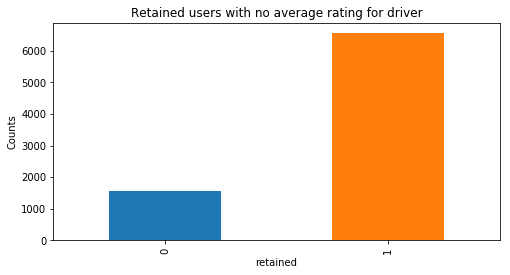

In [127]:
no_driver_rate.groupby('retained')['avg_dist'].count().plot(kind='bar', figsize=(8,4))
plt.ylabel('Counts')
plt.title('Retained users with no average rating for driver')
plt.show()

In [116]:
no_user_rate = df1[df1.avg_rating_by_driver.isnull()]

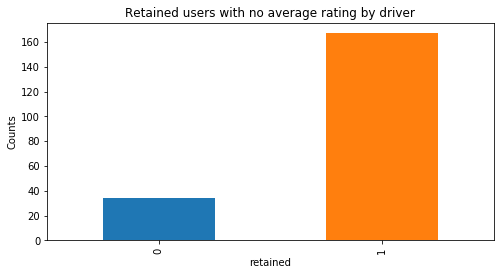

In [126]:
no_user_rate.groupby('retained')['avg_dist'].count().plot(kind='bar', figsize=(8,4))
plt.ylabel('Counts')
plt.title('Retained users with no average rating by driver')
plt.show()

In [121]:
no_rate_df1 = df1[(df1.avg_rating_of_driver.isnull()) & (df1.avg_rating_by_driver.isnull())]

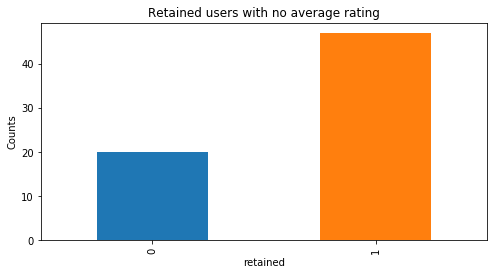

In [125]:
no_rate_df1.groupby('retained')['avg_dist'].count().plot(kind='bar', figsize=(8,4))
plt.ylabel('Counts')
plt.title('Retained users with no average rating')
plt.show()

### Since majority of users who don't have rating for driver, by driver or both were retained therefore we can use mean of each column respectively to fill missing values.

In [130]:
driver_rating_mean = df1.avg_rating_of_driver.mean()
user_rating_mean = df1.avg_rating_by_driver.mean()
print(driver_rating_mean)
print(user_rating_mean)

4.6015592912744685
4.778158195947439


In [131]:
df1.avg_rating_of_driver = df1.avg_rating_of_driver.fillna(driver_rating_mean)
df1.avg_rating_by_driver = df1.avg_rating_by_driver.fillna(user_rating_mean)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 4.2+ MB


In [135]:
df1.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

#### We already mentioned that there are missing values in "phone"we may need to drop it, but let's explore it.

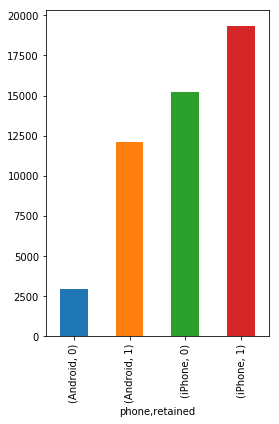

In [136]:
phone = df1.groupby(['phone', 'retained'])['avg_dist'].count()
phone.plot(kind='bar', figsize=(4,6), rot=90)
plt.show()

In [143]:
perc_android_lost = phone[0] / (phone[0] + phone[1])
perc_iphone_lost = phone[2] / (phone[2] + phone[3])
total_iphone = (phone[2] + phone[3])
total_android = (phone[0] + phone[1])
print('Percentage of iPhone Users Not Retained: {}'.format(perc_iphone_lost))
print('Total number of iPhone Users: {}'.format(total_iphone))
print('Percentage of Android Users Not Retained: {}'.format(perc_android_lost))
print('Total number of Android Users: {}'.format(total_android))

Percentage of iPhone Users Not Retained: 0.44063385576311376
Total number of iPhone Users: 34582
Percentage of Android Users Not Retained: 0.19584609239781653
Total number of Android Users: 15022


#### So iphone users who did not retain is double size of android users but in total number of iphone is double size of android so it does not appear any significant about user's retainment status, therefore it should be dropped. And also there is no correlation between signup date and retainment so it need to be dropped too. "ultimate_black_user" column should be encoded to 0 and 1(binary). 

In [144]:
#drop phone and signup_date columns
df1 = df1.drop(['phone','signup_date'], axis=1)
# encode ultimate_black_user; True=1|False=0
df1.ultimate_black_user = df1.ultimate_black_user.astype('category').cat.codes
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,0,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,0,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,1,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,0,82.4,1


#### Last variable that we should explore is city, to figure out the significance.

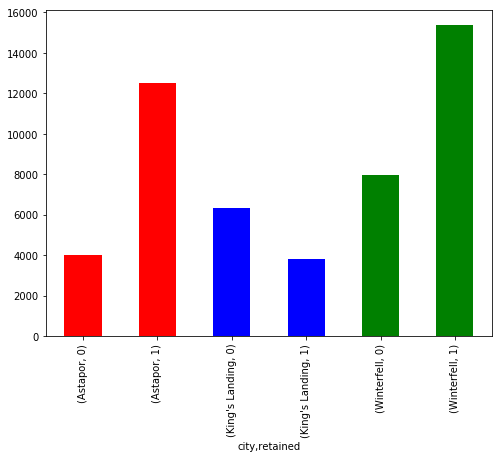

In [146]:
city_retained = df1.groupby(['city', 'retained'])['avg_dist'].count()
city_retained.plot(kind='bar', figsize=(8,6), rot=90, color = ['r', 'r', 'b', 'b', 'g', 'g'])
plt.show()

In [147]:
city_retained

city            retained
Astapor         0            4022
                1           12512
King's Landing  0            6307
                1            3823
Winterfell      0            7981
                1           15355
Name: avg_dist, dtype: int64

In [148]:
astapor_lost_perc = city_retained[0] / (city_retained[0] + city_retained[1])
print('Astapor Lost Percentage: {}'.format(astapor_lost_perc))
kings_lost_perc = city_retained[2] / (city_retained[2] + city_retained[3])
print("King's Landing Lost Percentage: {}".format(kings_lost_perc))
winter_lost_perc = city_retained[4] / (city_retained[4] + city_retained[5])
print('Winterfell Lost Percentage: {}'.format(winter_lost_perc))

Astapor Lost Percentage: 0.24325632030966493
King's Landing Lost Percentage: 0.6226061204343534
Winterfell Lost Percentage: 0.34200377099760026


#### As we can see, King's Landing failed 62% of user's retainment and needs more investigation.

In [149]:
df1.groupby('city')['surge_pct'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Astapor,16534.0,10.140305,21.947097,0.0,0.0,0.0,10.7,100.0
King's Landing,10130.0,9.966979,18.832035,0.0,0.0,0.0,14.3,100.0
Winterfell,23336.0,7.449927,18.832043,0.0,0.0,0.0,4.5,100.0


#### By looking at the describe, we can figure out that in King's landing on average people spend 10 percent of the time in surging, also their 75 percentile is at 14.3 which is higher that two others, that means prices seem to surge more often in this city than anywhere else therefore it can be significant eventhogh there is no metric to be sure about it but we need to consider that King's Landing lost 62 % of user's retainment.

In [150]:
#encode city column
df1.city = df1.city.astype('category').cat.codes

In [152]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,1,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,0,0.0,0,0,50.0,1
2,0.77,5.0,4.3,1.00,0,0.0,3,0,100.0,1
3,2.36,4.9,4.6,1.14,1,20.0,9,1,80.0,0
4,3.13,4.9,4.4,1.19,2,11.8,14,0,82.4,1


In [154]:
#prepare data set to make predictive model
Y = df1.retained
X = df1.drop('retained', axis=1)

#### We do some different models and compare their performance

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42)

In [160]:
from sklearn.linear_model import LogisticRegression
steps = [('scaler', StandardScaler()),('logreg', LogisticRegression())]
pipeline = Pipeline(steps)
c_space = np.logspace(-3, 5, 12)
parameters = {'logreg__C':c_space,'logreg__penalty':['l1', 'l2']}
cvl = GridSearchCV(pipeline, parameters, cv=5)
cvl.fit(X_train, y_train)
y_pred = cvl.predict(X_test)

In [161]:
print("Tuned CVl Parameter: {}".format(cvl.best_params_))
print("Tuned CVl Accuracy: {}".format(cvl.best_score_))

Tuned CVl Parameter: {'logreg__C': 0.1519911082952933, 'logreg__penalty': 'l1'}
Tuned CVl Accuracy: 0.6783


In [168]:
log_accuracy= accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('Test Accuracy: {}'.format(log_accuracy))

             precision    recall  f1-score   support

          0       0.63      0.30      0.40      7296
          1       0.69      0.90      0.78     12704

avg / total       0.67      0.68      0.64     20000

Test Accuracy: 0.6808


In [172]:
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classify', LinearSVC(loss = 'hinge'))
])

In [173]:
param_grid = [{'classify__C':[0.01,0.1,1,10,100]}]

In [174]:
svc_clf = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 5)

In [175]:
svc_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'classify__C': [0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [176]:
print('Best Accuracy Score: {}'.format(svc_clf.best_score_))
svm_preds = svc_clf.predict(X_test)
svm_accuracy= accuracy_score(y_test, svm_preds)
print(classification_report(y_test, svm_preds))
print('Test Accuracy: {}'.format(svm_accuracy))

Best Accuracy Score: 0.6629666666666667
             precision    recall  f1-score   support

          0       0.73      0.13      0.22      7296
          1       0.66      0.97      0.79     12704

avg / total       0.68      0.66      0.58     20000

Test Accuracy: 0.66415


In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
param_grid = {'n_estimators':[100,200,300,400,500],
              'max_leaf_nodes':[10,15,20,25]}
forest_clf = RandomForestClassifier()
forest_cv = GridSearchCV(forest_clf, param_grid = param_grid, cv=5)

In [192]:
forest_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_leaf_nodes': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
print('Best Random Forest Score: {}'.format(forest_cv.best_score_))
forest_preds = forest_cv.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_preds)
print(classification_report(y_test, forest_preds))
print('Test Accuracy: {}'.format(forest_accuracy))

Best Random Forest Score: 0.7591
             precision    recall  f1-score   support

          0       0.74      0.52      0.61      7296
          1       0.76      0.90      0.82     12704

avg / total       0.76      0.76      0.75     20000

Test Accuracy: 0.75805


In [184]:
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
param_grids = {
               'max_depth':[1,5,10,15],
               'n_estimators':[2,3,4,5],
               }

In [186]:
boost_clf = GradientBoostingClassifier()

In [187]:
boost_cv = GridSearchCV(boost_clf, param_grid=param_grids, cv = 5)

In [188]:
boost_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 15], 'n_estimators': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [189]:
print('Best Boosted Gradient Score: {}'.format(boost_cv.best_score_))
boost_pred = boost_cv.predict(X_test)
boost_accuracy = accuracy_score(y_test, boost_pred)
print(classification_report(y_test,boost_pred))
print('Test Accuracy: {}'.format(boost_accuracy))

Best Boosted Gradient Score: 0.7476333333333334
             precision    recall  f1-score   support

          0       0.79      0.45      0.57      7296
          1       0.75      0.93      0.83     12704

avg / total       0.76      0.75      0.73     20000

Test Accuracy: 0.7537


#### Conclusion<br> based on the accuracy of the performance of each model, the best one could be random forest slightly but it does not mean we should choose it, we can also work on GradientBoostingClassifier by training more data since this model learns from previous errors and perform better. Therefore the recommended model could be GradientBoostingClassifier by doing better on trained data and after a while see how it performs.